### During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA

### E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

In this kernel we will be building a decision tree model.After that we will pruning the decision tree to avoid overfittig.In this notebook we will be covering following things 

1.Data Import and Preprocesing 

2.Feature Engineering 

3.Decision Tree Model Build 

4.Model Evaluation 

5.Decision Tree Prunning 

6.Conclusion

In [1]:
#This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


# 1.Importing Data and Pre Processing 

### Importing Python Modules

In [2]:
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore') 

### Importing Dataset

In [3]:
dataset=pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


So in the datset we have the User ID, Gender,Age,Salary and the data if Purchase made by a user.

# 2.Feature Engineering 

### Creating Matrix of Features 

In [4]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

### Splitting Data into Train and Test 

In [5]:
from sklearn.model_selection import train_test_split   #cross_validation doesnt work any more
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 
#X_train

### Feature Scaling 

In [6]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
#X_train

We have scaled the data because we have considered Age and Estimated salary to make the purchase prediction.There is a big difference in the reange of these features.

# 3.Model Built 

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# 4.Model Evaluation 

### Ploting Decision Tree

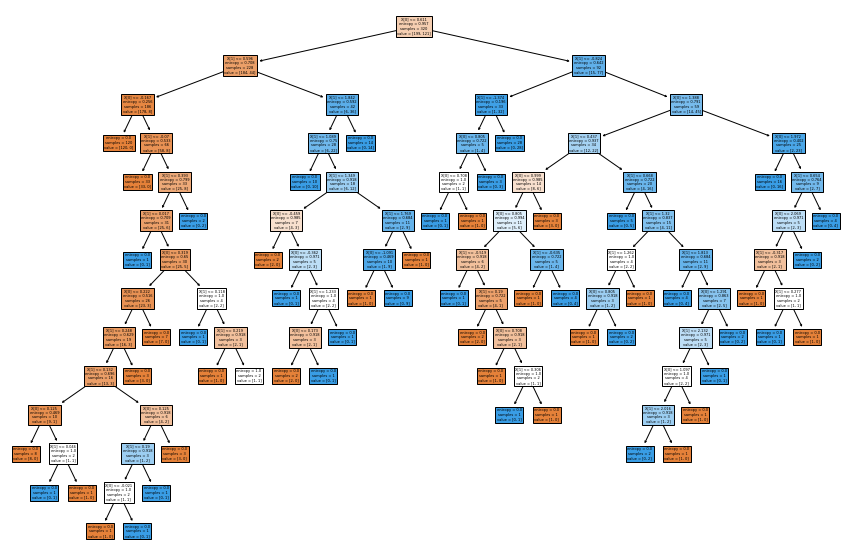

In [8]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

We can see that our tree has many nodes.So Splitting has taken place many times.The problem with this is that we may have good accuracy on our training Dataset because the model learns by heart the values.We we try to predict the result for unseen data (test) data there is possibility of our accuracy reducing.

### Accuracy Score 

In [9]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = clf.predict(X_test)
y_train = clf.predict(X_train)
from sklearn.metrics import accuracy_score 
print("Train Accuracy is:",accuracy_score(y_train,y_train))
print("Test Accuracy is:",accuracy_score(y_test,y_pred))

Train Accuracy is: 1.0
Test Accuracy is: 0.925


We can see that we have 100% accuracy for our training test and around 92.5% accuracy for our test set.This shows that our training model set is overfitting.

### Confusion Matrix

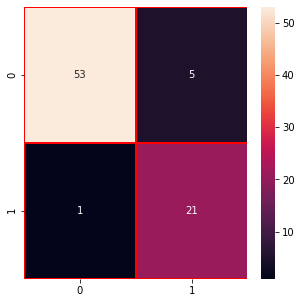

In [10]:
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.show()

###  Classification Report 

In [11]:
cr =classification_report(y_test,y_pred)
print("Classification Report")
print(cr)

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.91      0.95        58
           1       0.81      0.95      0.88        22

    accuracy                           0.93        80
   macro avg       0.89      0.93      0.91        80
weighted avg       0.93      0.93      0.93        80



We have quite good value of Accuracy and F1 Score.

### Visualising the Training Set 

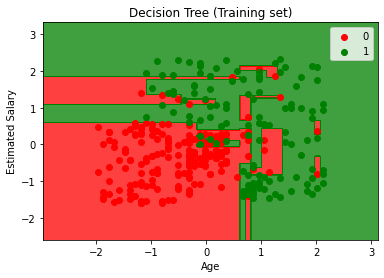

In [12]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,clf.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test Set

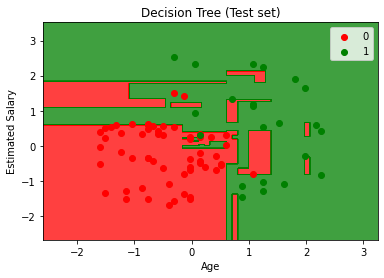

In [13]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,clf.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Decision Tree (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

From above training set results we can see that our model is overfitting on training set.We can reduce the overfitting by pruning our decision tree.

# 5.Decision Tree Pruning 

In the desision tree algorithm there are parameters like min_samples_leaf and max_depth to prevent the tree from overfitting.We can use another method cost complexity pruning to control the ize of our trees.The complexity of tree is controlled by a parameter ccp_alpha.Greater value of ccp_alpha meanse more number of nodes in the tree are pruned.

In [14]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.00376004, 0.00430451, 0.00430451, 0.00470276,
       0.00505703, 0.00523457, 0.00529809, 0.00564006, 0.00572139,
       0.00590297, 0.00593792, 0.00638076, 0.00644211, 0.00847587,
       0.00863665, 0.00892302, 0.00893394, 0.009927  , 0.01003409,
       0.01129667, 0.01300146, 0.01480753, 0.01513461, 0.01849122,
       0.02375156, 0.03383263, 0.27893409])

In [15]:

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2789340883820818


### Training and Test Accurac Vs Alpha 

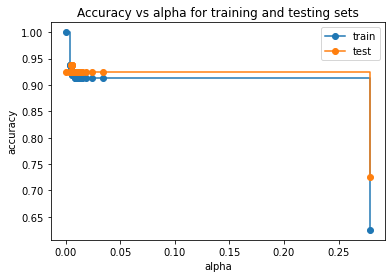

In [16]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

From the above cure we can see that we can get train and test set accuracy when we select the alpha value between 0.02 to 0.27.So I am selecting a value of 0.12 for alpha while creating the decision tree model.

In [17]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.12)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.12, random_state=0)

In [18]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.925

### Pruned Decision Tree

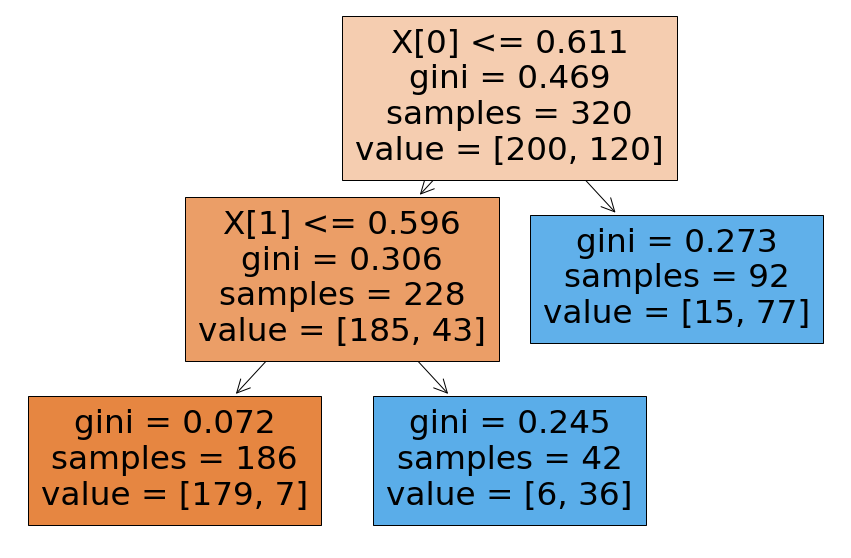

In [19]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

So by using alpha value as 0.12 we have been able to prune our decision tree to a large extent.This help in time reduction for training and also prevents overfitting of our models.

# 6.Conclusion

1.In this data set we had Age,Salary,Sex and purchase decision.We have made use of Age,Salary to predict whether a customer will make a purchase decision.

2.We have used feature scaling and then built a decision tree model to make purchase prediction.

3.Based on the model evaluation we could conclude that our model had over fitting on the training set.

4.We used Decision Tree Pruning technique to optimise over model.This reduced the size of our decision tree by considering an optimum value of alpha.

# TO BE CONTINUED